# URUN SATIN ALIM OPTİMİZASYON

Problem:Müşteriler sepete ürün ekleme sonrasında ödeme ekranında 5 adımla karşılaşıyor.Bu adımların biri sorgulanmak isteniyor.

1. Sepeti onaylama
2. banka kart girişi
3. banka onayı
4. taksit veya nakit seçimi
5. sözleşme ve sipariş onay

Bu adımlardan 4. adım sorgulanmak isteniyor ---> müşteriler burada ortalama 20 saniye vakit geçirdiği savı ortaya konuluyor.
Gerçekten 20 saniyemi yoksa değilmi ispatlanmak isteniyor ve Tek Örneklem T Testi uygulanıyor.

Durumu test etmek için 100 örnek alınıyor.

Tek Örneklem T Testi aşamaları :

1. Adım 1 : hipotezler kurulur 
2. Adım 2 : varsayımlar ispatlanır(normallik varsayımı)
3. Adım 3 :T Testi uygulanır 
4. Adım 4 : p-value degerine bakilir
5. Adım 5 : Yorum yapilir


In [46]:
import numpy as np
import pandas as pd
import seaborn as sb
#gerekli kutuphaneler import edilir 
degerler = np.random.randint(16,30,100)
degerler[1:11]
# degerlerrin ilk 10 deger gosterilir

array([18, 21, 26, 18, 28, 28, 17, 28, 23, 17])

In [26]:
type(degerler)
#degerler numpy arrayinin veri tipi sorgulanir

numpy.ndarray

In [27]:
deger_df=pd.DataFrame(degerler)
deger_df.info()
#görselleştirmek icin deger_df adinda dataframe olusturulur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       100 non-null    int32
dtypes: int32(1)
memory usage: 528.0 bytes


In [28]:
deger_df.isnull().values.any()
#eksik veri kontrolu yapilir

False

In [29]:
deger_df.head()
#ilk 5 deger gosterilir

,0
0,28
1,18
2,28
3,21
4,23


In [30]:
deger_df.rename(columns = {0:'sureler'}, inplace = True)
#sutun ismi yeniden adlandirilir

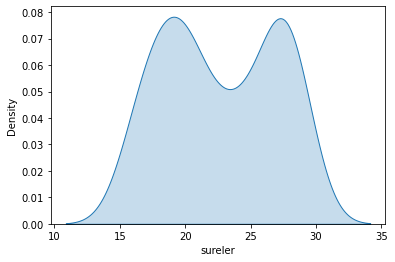

In [31]:
sb.kdeplot(deger_df["sureler"],shade=True);
#dagilim grafigi gosterilir

In [32]:
degerler.mean() 
#degerlerin ortalamasi gosterilir

22.68

Ortalaması 23 evet 20 den fazla yani gecirilen sure 20 degildir diyebiliriz ama bu belki sans eseri olusmus olabilir
Bu yüzden hipote testi uygulanir

 Adim 1 : H0 = 20 (ortalama gecirilen süre 20 )  H1 != 20  (ortalama gecirilen süre 20 degil) 

In [34]:
import scipy.stats as stat
stat.describe(degerler)
#temel istatistik degerleri yazdirilir

DescribeResult(nobs=100, minmax=(16, 29), mean=22.68, variance=18.48242424242424, skewness=0.008412805374711741, kurtosis=-1.4453197859743738)

Adim 2 : varsayim = normallik varsayim ispati (T hipotez testinin yapılabilmesi için normallik varsayimi saglanmali)


In [36]:
# shapiro wilks testi kullanilir 
# shapiro wilks testi :eger p-value 0.05 den kucuk cıkarsa ornek dagilim ile teorik dagilim arasinda anlamli fark yoktur

from scipy.stats import shapiro
shapiro(degerler)

ShapiroResult(statistic=0.9108930230140686, pvalue=4.775229172082618e-06)

In [38]:
print("statistic : %.4f p-value degeri : %.6f"%(shapiro(degerler)))

statistic : 0.9109 p-value degeri : 0.000005


p-value degeri 0.05 den kucuk bu yuzden ornek dagilim ve teorik dagilim arasi fark yoktur yani normal dagilimdir

In [43]:
#Adim 3 : T Testi uygulanir 
from scipy.stats import stats

stats.ttest_1samp(degerler,popmean=20)


Ttest_1sampResult(statistic=6.233835339742463, pvalue=1.1201593360821081e-08)

In [45]:
# Adim 4 p-value degeri bulunur:
print("statistic : %.4f p-value degeri : %.10f"%(stats.ttest_1samp(degerler,popmean=20)))

statistic : 6.2338 p-value degeri : 0.0000000112


P-value degeri 0.05 den kucuk oldugu icin H0 hipotezi kabul edilir yani ortalama gecirilen süre 20 dir.